# Medicare Fraud - Outpatient Exploratory Data Analysis

Mustapha Mbengue, Peyton Nash, Bradley Stoller, Kyler Rosen

3/9/25

Purpose: Conducts exploratory data analysis on the outpatient data.

# Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Function Library

In [22]:
def plot_numerical_distributions(df, continuous_vars, logged= False):
    """
    Plot boxplots and histograms for a list of numerical columns in a dataset.
    """
    num_features = len(continuous_vars)

    # Initialize the figure and axes
    fig, axes = plt.subplots(num_features, 2, figsize=(12, 3 * num_features))

    # Ensure correct handling for a single feature
    if num_features == 1:
        axes = np.array(axes).reshape(1, 2)

    # Loop through the numerical features
    for i, feature in enumerate(continuous_vars):
        display_name = str(feature).title()

        # Create boxplot
        if logged:
            sns.boxplot(y= np.log1p(df[feature]), ax=axes[i, 0], width=0.3, color='cornflowerblue')
        else:
            sns.boxplot(y=df[feature], ax=axes[i, 0], width=0.3, color='cornflowerblue') 
        axes[i, 0].set_xticks([])
        axes[i, 0].set_xlabel('Boxplot', fontsize=10)
        axes[i, 0].set_ylabel(display_name, fontsize=10)
        axes[i, 0].set_title(f'Boxplot of Log Transformed {display_name}', fontweight='bold', fontsize=12)

        # Create histogram
        if logged:
            sns.histplot(np.log1p(df[feature]), bins=30, kde=True, ax=axes[i, 1], color='cornflowerblue')
            axes[i, 1].set_xlabel(display_name, fontsize=10)
            axes[i, 1].set_ylabel('Count', fontsize=10)
            axes[i, 1].set_title(f'Histogram of Log Transformed {display_name}', fontweight='bold', fontsize=12)
        else:
            sns.histplot(df[feature], bins=30, kde=True, ax=axes[i, 1], color='cornflowerblue')
            axes[i, 1].set_xlabel(display_name, fontsize=10)
            axes[i, 1].set_ylabel('Count', fontsize=10)
            axes[i, 1].set_title(f'Histogram of {display_name}', fontweight='bold', fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.show()


def categorical_distribution_analysis(df, df_name, categorical_cols):
    """
    Plot bar graphs and count plots of the categorical columns
    """
    
    # Intialize the axis
    num_cols = len(categorical_cols)
    fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))

    # Loop through the categorical columns for plotting
    for i, col in enumerate(categorical_cols):
        top_categories = df[col].value_counts().nlargest(5)

        # Create bar plot for top 5 categories
        sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i, 0], palette="coolwarm")
        axes[i, 0].set_title(f"Top 5 Categories in {col}")
        axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45, ha="right")

        # Create count plot for top 5 categories
        sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes[i, 1], palette="viridis")
        axes[i, 1].set_title(f"Category Distribution in {col}")
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Outpatient (labeled) EDA

In [23]:
inpatient_labeled = pd.read_csv('../01_data/raw/Train_Inpatientdata-1542865627584.csv', parse_dates= ['ClaimStartDt', 'ClaimEndDt'])
inpatient_labeled.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [24]:
inpatient_labeled.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

Set the numerical and categorical columns to be used in the analysis

In [25]:
num_cols = [
    'ClaimStartDt', 'ClaimEndDt', 'InscClaimAmtReimbursed', 'AdmissionDt',
    'DeductibleAmtPaid', 'DischargeDt'
]

cat_cols = [
    'BeneID', 'ClaimID', 'Provider', 'AttendingPhysician', 'OperatingPhysician',
    'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
    'DiagnosisGroupCode','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 
    'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 
    'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 
    'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 
    'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 
    'ClmProcedureCode_5', 'ClmProcedureCode_6'
]

In [26]:
print("Shape:", outpatient_labeled.shape)
print("\nDataframe Info:")
print(outpatient_labeled.info())

Shape: (40474, 30)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  40474 non-null  object        
 1   ClaimID                 40474 non-null  object        
 2   ClaimStartDt            40474 non-null  datetime64[ns]
 3   ClaimEndDt              40474 non-null  datetime64[ns]
 4   Provider                40474 non-null  object        
 5   InscClaimAmtReimbursed  40474 non-null  int64         
 6   AttendingPhysician      40362 non-null  object        
 7   OperatingPhysician      23830 non-null  object        
 8   OtherPhysician          4690 non-null   object        
 9   AdmissionDt             40474 non-null  object        
 10  ClmAdmitDiagnosisCode   40474 non-null  object        
 11  DeductibleAmtPaid       39575 non-null  float64       
 12  DischargeD

In [27]:
# Check missing Values
print('Missing Value Analysis:')
(100 * pd.isnull(inpatient_labeled).sum() / len(inpatient_labeled)).sort_values(ascending=False)

Missing Value Analysis:


ClmProcedureCode_6        100.000000
ClmProcedureCode_5         99.977764
ClmProcedureCode_4         99.713396
ClmProcedureCode_3         97.615753
ClmDiagnosisCode_10        90.297475
OtherPhysician             88.412314
ClmProcedureCode_2         86.524683
ClmProcedureCode_1         42.807728
OperatingPhysician         41.122696
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_4          3.790087
DeductibleAmtPaid           2.221179
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_2          0.558383
AttendingPhysician          0.276721
ClaimID                     0.000000
ClmDiagnosisCode_1          0.000000
DiagnosisGroupCode          0.000000
DischargeDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
AdmissionDt                 0.000000
InscClaimAmtReimbursed      0.000000
Provider                    0.000000
C

There appear to be significant missing values, but this is mostly in columns where patients are not expected to have values. Such as if they did not need a 6th procedure/claim.

In [28]:
inpatient_labeled[num_cols].describe()

,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,DeductibleAmtPaid
count,40474,40474,40474.000000,39575.0
mean,2009-06-19 17:46:36.284034048,2009-06-25 09:37:21.972624384,10087.884074,1068.0
min,2008-11-27 00:00:00,2009-01-01 00:00:00,0.000000,1068.0
25%,2009-03-20 00:00:00,2009-03-26 00:00:00,4000.000000,1068.0
50%,2009-06-16 00:00:00,2009-06-22 00:00:00,7000.000000,1068.0
75%,2009-09-17 00:00:00,2009-09-23 00:00:00,12000.000000,1068.0
max,2009-12-31 00:00:00,2009-12-31 00:00:00,125000.000000,1068.0
std,NaN,NaN,10303.099402,0.0


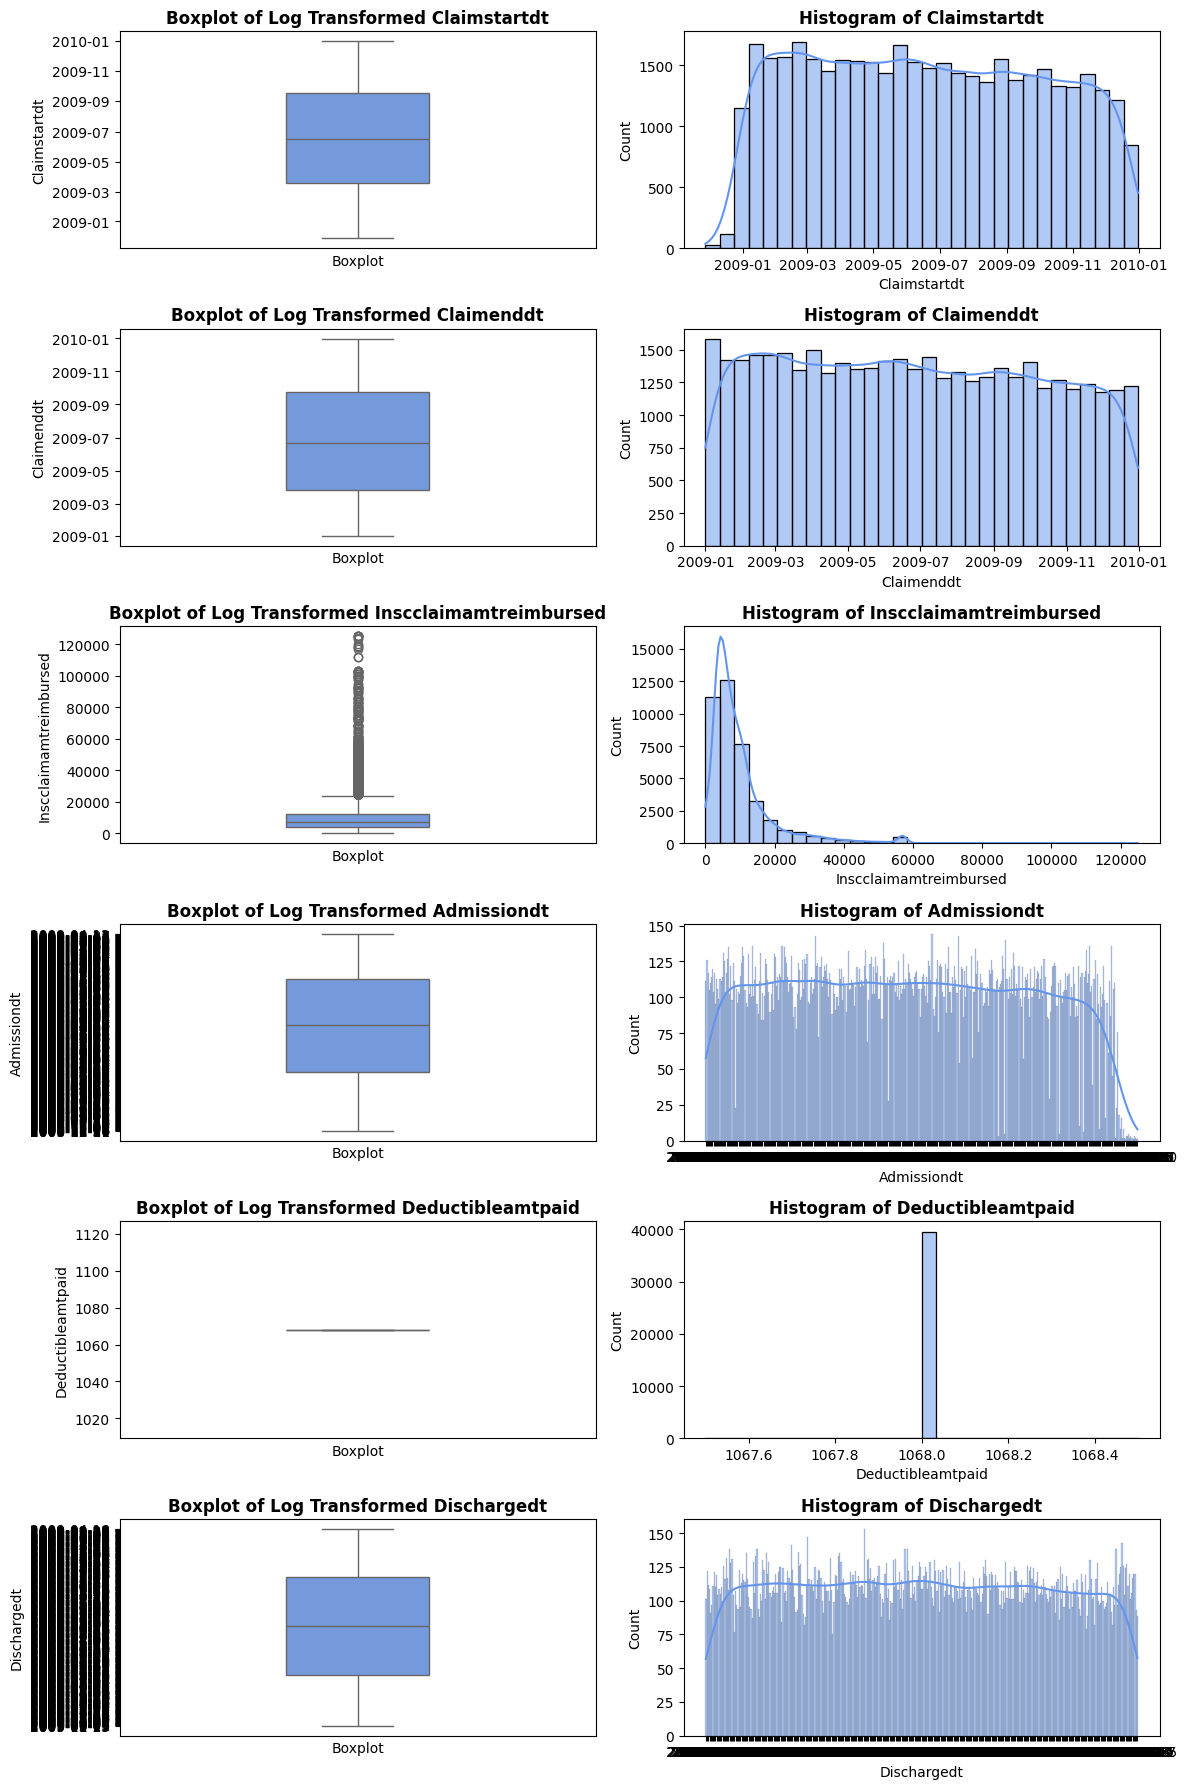

In [29]:
plot_numerical_distributions(inpatient_labeled, num_cols)

The numerical columns (besides the dates) appear to be fairly skewed. We can try log transforming them to see if they appear more Gaussian:

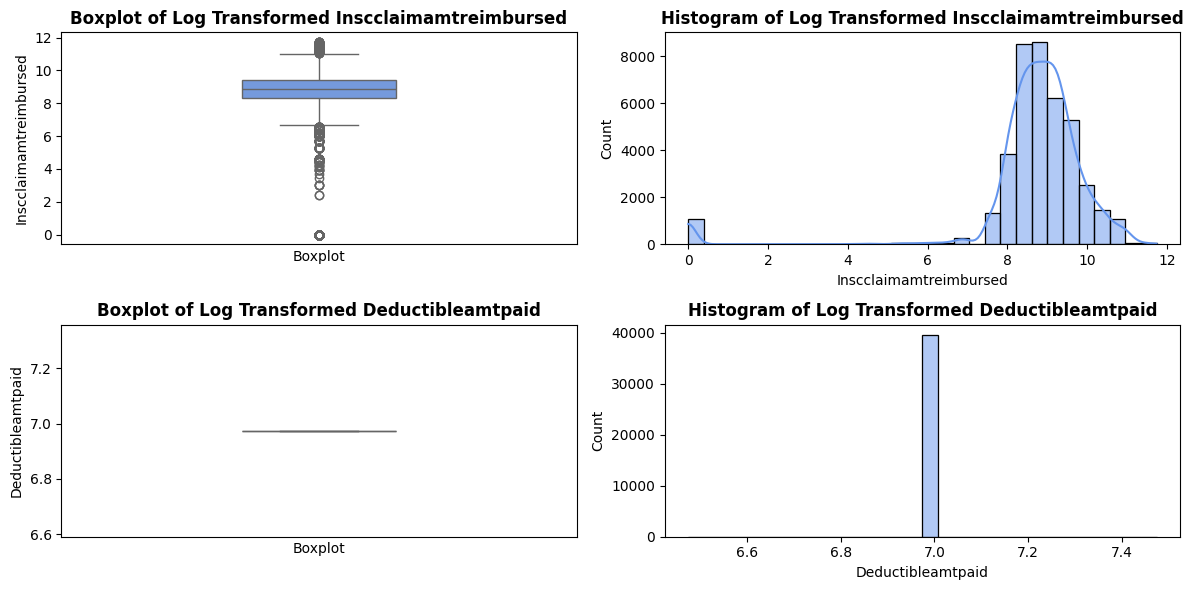

In [30]:
plot_numerical_distributions(inpatient_labeled, ['InscClaimAmtReimbursed', 'DeductibleAmtPaid'], logged= True)

As we can, log transforming the remimbursement amount definitely improved the shape of the distribution, but the deductible amount is still very skewed, even after log transformation.

/var/folders/6c/lknfcl0j3lb3skfwn995xkym0000gn/T/ipykernel_95394/2725841631.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i, 0], palette="coolwarm")
/var/folders/6c/lknfcl0j3lb3skfwn995xkym0000gn/T/ipykernel_95394/2725841631.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45, ha="right")
/var/folders/6c/lknfcl0j3lb3skfwn995xkym0000gn/T/ipykernel_95394/2725841631.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes

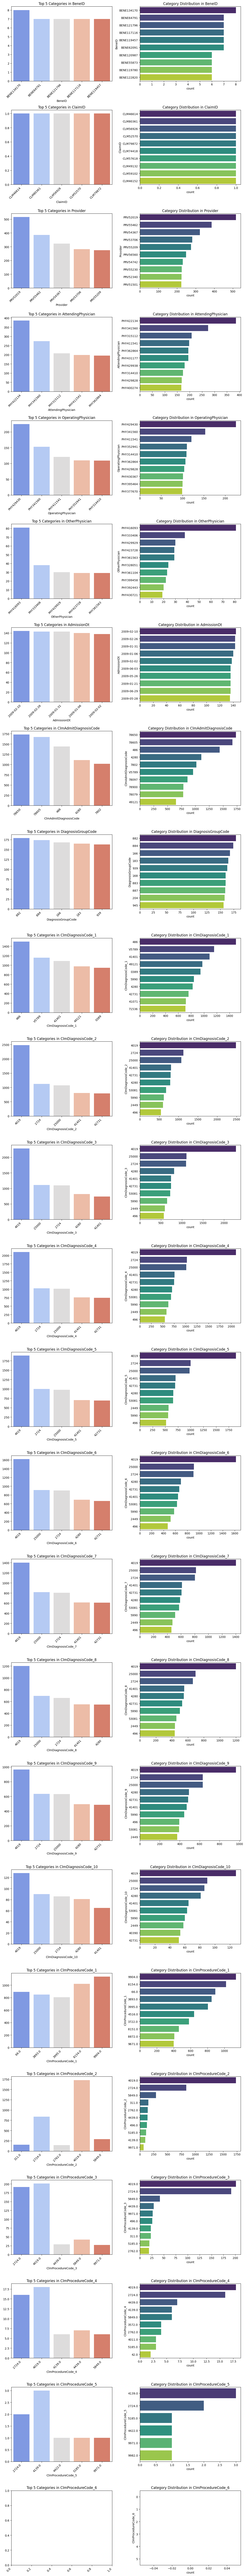

In [31]:
categorical_distribution_analysis(inpatient_labeled, 'Inpatient Labeled', cat_cols)

# Outpatient (unlabeled) EDA

In [32]:
inpatient_unlabeled = pd.read_csv('../data/raw/Test_Inpatientdata-1542969243754.csv', parse_dates= ['ClaimStartDt', 'ClaimEndDt'])
inpatient_unlabeled.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
print("Shape:", inpatient_unlabeled.shape)
print("\nDataframe Info:")
print(inpatient_unlabeled.info())

Shape: (9551, 30)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  9551 non-null   object        
 1   ClaimID                 9551 non-null   object        
 2   ClaimStartDt            9551 non-null   datetime64[ns]
 3   ClaimEndDt              9551 non-null   datetime64[ns]
 4   Provider                9551 non-null   object        
 5   InscClaimAmtReimbursed  9551 non-null   int64         
 6   AttendingPhysician      9520 non-null   object        
 7   OperatingPhysician      5589 non-null   object        
 8   OtherPhysician          1013 non-null   object        
 9   AdmissionDt             9551 non-null   object        
 10  ClmAdmitDiagnosisCode   9551 non-null   object        
 11  DeductibleAmtPaid       9355 non-null   float64       
 12  DischargeDt  

In [34]:
# Check missing Values
print('Missing Value Analysis:')
(100 * pd.isnull(inpatient_unlabeled).sum() / len(inpatient_unlabeled)).sort_values(ascending=False)

Missing Value Analysis:


ClmProcedureCode_6        100.000000
ClmProcedureCode_5         99.979060
ClmProcedureCode_4         99.696367
ClmProcedureCode_3         97.665166
ClmDiagnosisCode_10        90.713014
OtherPhysician             89.393781
ClmProcedureCode_2         86.870485
ClmProcedureCode_1         43.115904
OperatingPhysician         41.482567
ClmDiagnosisCode_9         33.902209
ClmDiagnosisCode_8         24.709455
ClmDiagnosisCode_7         18.176107
ClmDiagnosisCode_6         12.532719
ClmDiagnosisCode_5          7.528008
ClmDiagnosisCode_4          4.229924
DeductibleAmtPaid           2.052141
ClmDiagnosisCode_3          1.769448
ClmDiagnosisCode_2          0.565386
AttendingPhysician          0.324573
ClaimID                     0.000000
ClmDiagnosisCode_1          0.000000
DiagnosisGroupCode          0.000000
DischargeDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
AdmissionDt                 0.000000
InscClaimAmtReimbursed      0.000000
Provider                    0.000000
C

There appear to be significant missing values, but this is mostly in columns where patients are not expected to have values. Such as if they did not need a 6th procedure/claim.

In [35]:
inpatient_unlabeled[num_cols].describe()

,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,DeductibleAmtPaid
count,9551,9551,9551.000000,9355.0
mean,2009-06-21 16:46:41.298293248,2009-06-27 11:06:24.085435904,10105.306251,1068.0
min,2008-11-27 00:00:00,2009-01-01 00:00:00,0.000000,1068.0
25%,2009-03-23 00:00:00,2009-03-28 00:00:00,4000.000000,1068.0
50%,2009-06-19 00:00:00,2009-06-25 00:00:00,7000.000000,1068.0
75%,2009-09-18 00:00:00,2009-09-24 00:00:00,12000.000000,1068.0
max,2009-12-31 00:00:00,2009-12-31 00:00:00,125000.000000,1068.0
std,NaN,NaN,10316.862711,0.0


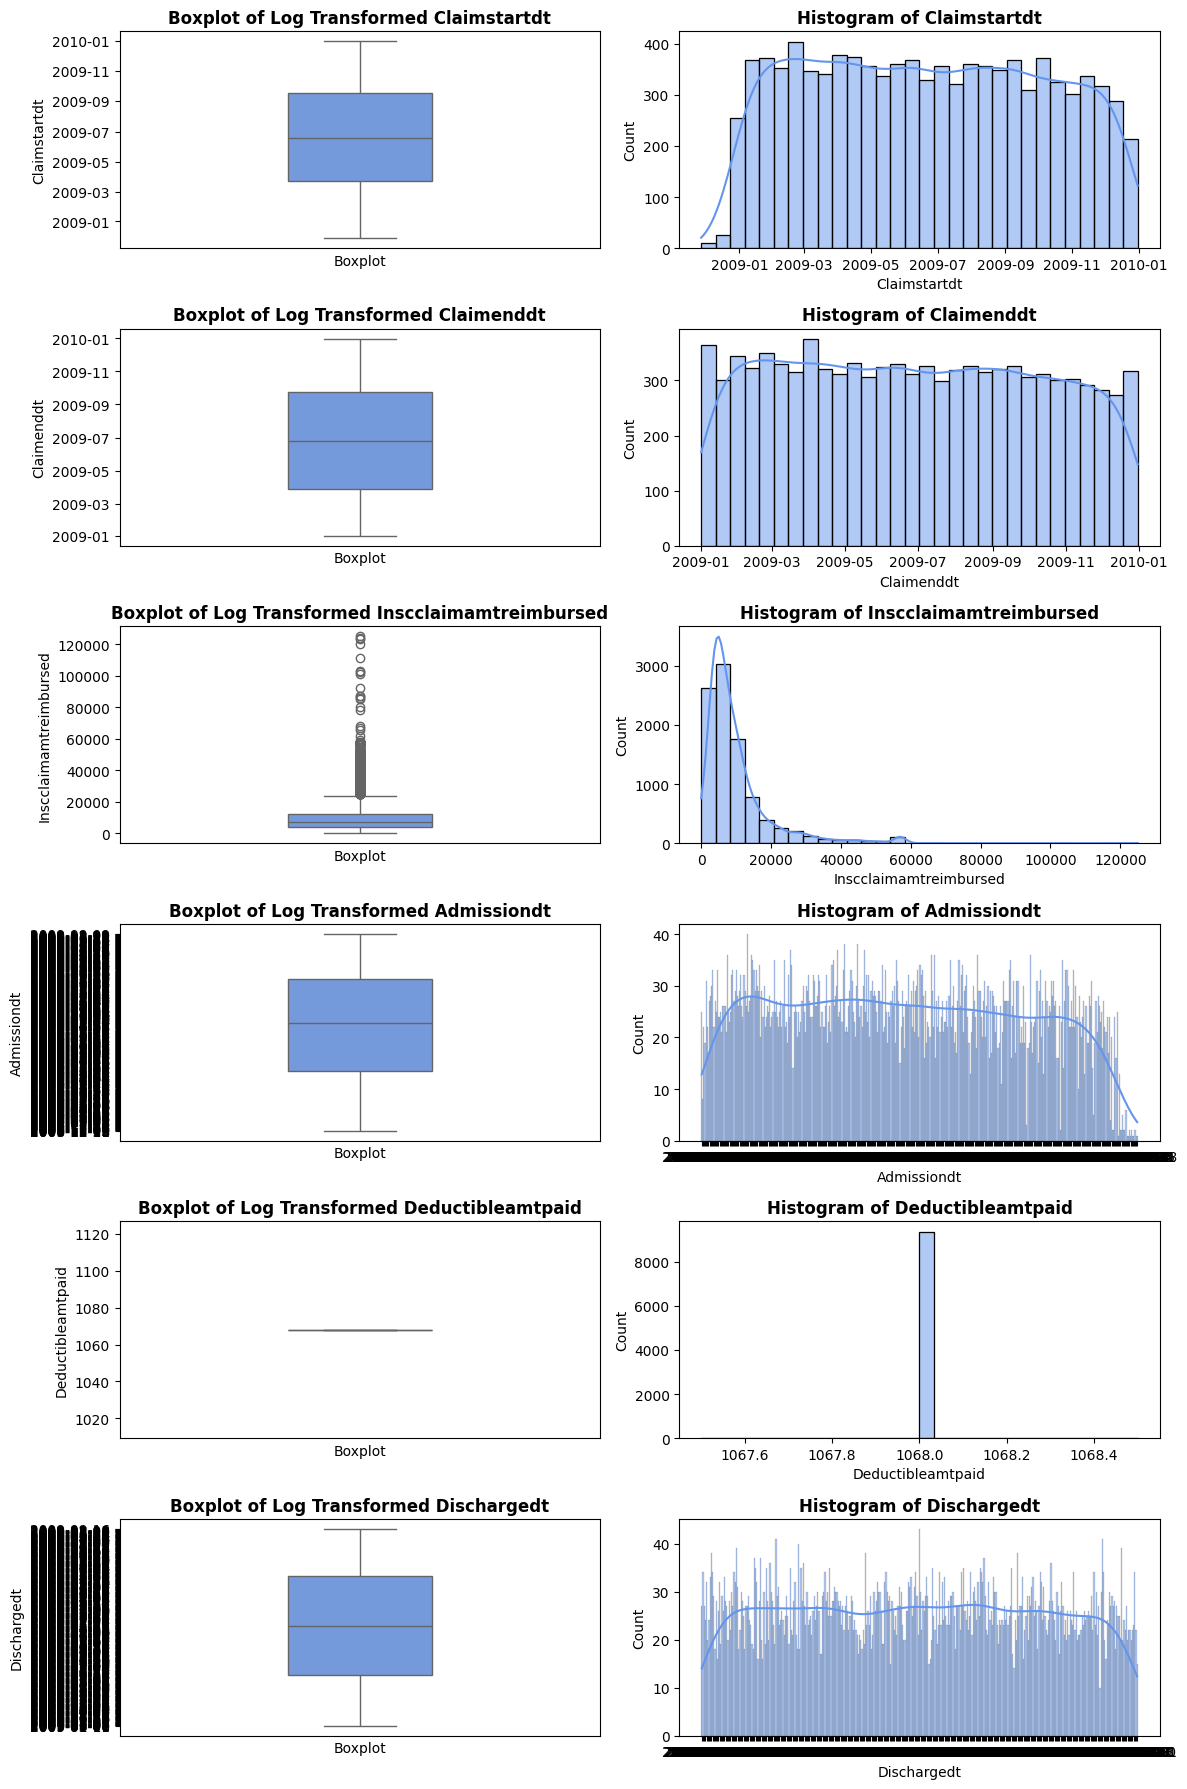

In [36]:
plot_numerical_distributions(inpatient_unlabeled, num_cols)

The numerical columns (besides the dates) appear to be fairly skewed. We can try log transforming them to see if they appear more Gaussian:

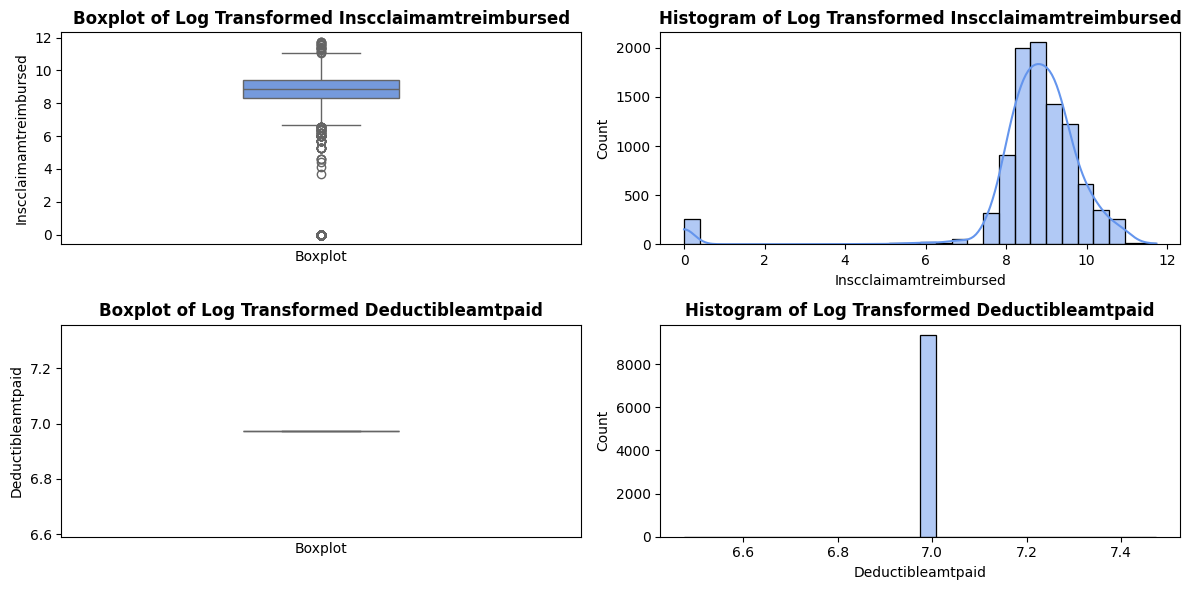

In [37]:
plot_numerical_distributions(inpatient_unlabeled, ['InscClaimAmtReimbursed', 'DeductibleAmtPaid'], logged= True)

As we can, log transforming the remimbursement amount definitely improved the shape of the distribution, but the deductible amount is still very skewed, even after log transformation.

/var/folders/6c/lknfcl0j3lb3skfwn995xkym0000gn/T/ipykernel_95394/2725841631.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, ax=axes[i, 0], palette="coolwarm")
/var/folders/6c/lknfcl0j3lb3skfwn995xkym0000gn/T/ipykernel_95394/2725841631.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i, 0].set_xticklabels(axes[i, 0].get_xticklabels(), rotation=45, ha="right")
/var/folders/6c/lknfcl0j3lb3skfwn995xkym0000gn/T/ipykernel_95394/2725841631.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index[:10], ax=axes

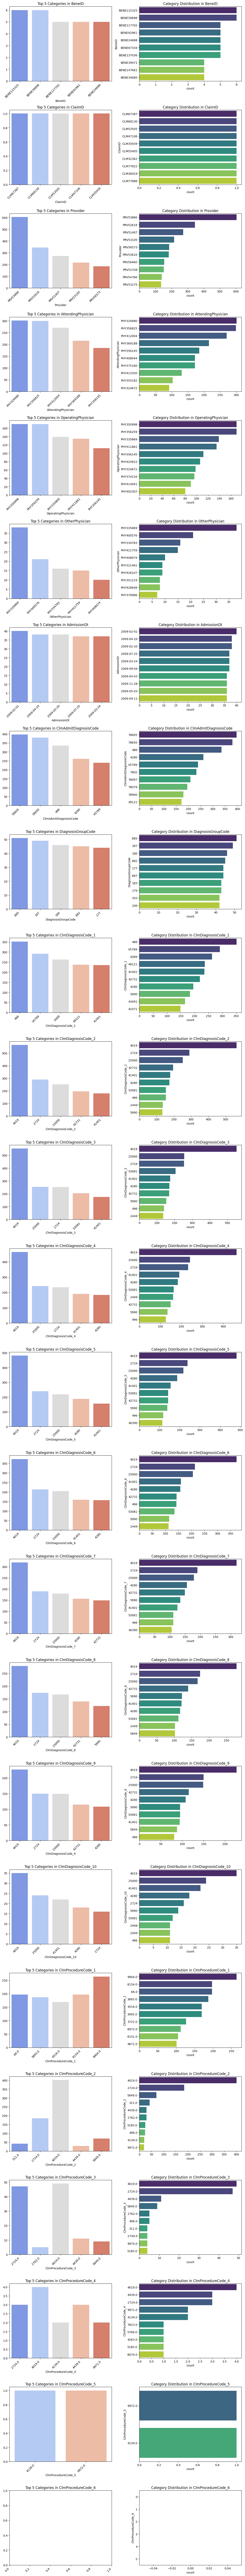

In [38]:
categorical_distribution_analysis(inpatient_unlabeled, 'Inpatient Unlabelled', cat_cols)

# Outpatient (appended) EDA

In [39]:
df_appended = pd.concat([inpatient_labeled, inpatient_unlabeled])

In [40]:
print("Shape:", df_appended.shape)
print("\nDataframe Info:")
print(df_appended.info())

Shape: (50025, 30)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
Index: 50025 entries, 0 to 9550
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   BeneID                  50025 non-null  object        
 1   ClaimID                 50025 non-null  object        
 2   ClaimStartDt            50025 non-null  datetime64[ns]
 3   ClaimEndDt              50025 non-null  datetime64[ns]
 4   Provider                50025 non-null  object        
 5   InscClaimAmtReimbursed  50025 non-null  int64         
 6   AttendingPhysician      49882 non-null  object        
 7   OperatingPhysician      29419 non-null  object        
 8   OtherPhysician          5703 non-null   object        
 9   AdmissionDt             50025 non-null  object        
 10  ClmAdmitDiagnosisCode   50025 non-null  object        
 11  DeductibleAmtPaid       48930 non-null  float64       
 12  DischargeDt     

In [41]:
# Check missing Values
print('Missing Value Analysis:')
(100 * pd.isnull(df_appended).sum() / len(df_appended)).sort_values(ascending=False)

Missing Value Analysis:


ClmProcedureCode_6        100.000000
ClmProcedureCode_5         99.978011
ClmProcedureCode_4         99.710145
ClmProcedureCode_3         97.625187
ClmDiagnosisCode_10        90.376812
OtherPhysician             88.599700
ClmProcedureCode_2         86.590705
ClmProcedureCode_1         42.866567
OperatingPhysician         41.191404
ClmDiagnosisCode_9         33.453273
ClmDiagnosisCode_8         24.591704
ClmDiagnosisCode_7         17.979010
ClmDiagnosisCode_6         12.063968
ClmDiagnosisCode_5          7.222389
ClmDiagnosisCode_4          3.874063
DeductibleAmtPaid           2.188906
ClmDiagnosisCode_3          1.689155
ClmDiagnosisCode_2          0.559720
AttendingPhysician          0.285857
ClaimID                     0.000000
ClmDiagnosisCode_1          0.000000
DiagnosisGroupCode          0.000000
DischargeDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
AdmissionDt                 0.000000
InscClaimAmtReimbursed      0.000000
Provider                    0.000000
C

There appear to be significant missing values, but this is mostly in columns where patients are not expected to have values. Such as if they did not need a 6th procedure/claim.

In [42]:
df_appended[num_cols].describe()

,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,DeductibleAmtPaid
count,50025,50025,50025.000000,48930.0
mean,2009-06-20 02:45:01.673163520,2009-06-25 19:04:13.673163520,10091.210395,1068.0
min,2008-11-27 00:00:00,2009-01-01 00:00:00,0.000000,1068.0
25%,2009-03-21 00:00:00,2009-03-27 00:00:00,4000.000000,1068.0
50%,2009-06-17 00:00:00,2009-06-23 00:00:00,7000.000000,1068.0
75%,2009-09-17 00:00:00,2009-09-23 00:00:00,12000.000000,1068.0
max,2009-12-31 00:00:00,2009-12-31 00:00:00,125000.000000,1068.0
std,NaN,NaN,10305.627672,0.0


In [54]:
df_appended[['InscClaimAmtReimbursed', 'DeductibleAmtPaid']].describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid
count,50025.000000,48930.0
mean,10091.210395,1068.0
std,10305.627672,0.0
min,0.000000,1068.0
25%,4000.000000,1068.0
50%,7000.000000,1068.0
75%,12000.000000,1068.0
max,125000.000000,1068.0
